In [1]:
import pandas as pd
import joblib
from sqlalchemy import create_engine
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Here I will be loading the saved validation set to validate and measure the performance of my model and I will also load my model which was saved in pickle file and use that model to predict car prices from the validation set 

In [2]:
# Loading the validation set
val_set = pd.read_csv("validation_set.csv")

# Splitting features and target
X_val = val_set.drop(columns=['price'])  
y_val = val_set['price']

# Load the trained model
rf_model = joblib.load("random_forest_model.pkl")

# Generate predictions
y_pred = rf_model.predict(X_val)

# Store predictions in DataFrame
val_set["predictions"] = y_pred
val_set.to_csv("validation_predictions.csv", index=False)

In [3]:
desired_columns = ['price', 'predictions']

In [4]:
val_set = val_set[desired_columns]

In [5]:
val_set.rename(columns={'price': 'actual_price'}, inplace=True)

I will connect my database so, that I can fill the predictions of prices and actual prices of the car in it.

In [6]:
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'postgres' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [7]:
engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

I will save the table named as "validation_predictions" in schema "analytics"

In [8]:
table_name = r'validation_predictions'
schema = r'analytics' 

val_set.to_sql(table_name, con=engine, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

27

In [9]:
#val_set.to_sql("validation_predictions", engine, schema="analytics", if_exists="replace", index=False)

In [10]:
# Quick statistical summary
# summary = val_set[["price", "predictions"]].describe()
# print(summary)

# Calculate error metrics


mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Performance of my model in validation set")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Performance of my model in validation set
Mean Absolute Error (MAE): 1355.8093827160494
Mean Squared Error (MSE): 3928650.2470381977
R² Score: 0.863056576925572


### Summary

I built a Random Forest Regressor model to predict car prices and evaluated its performance on my validation set. The model achieved an R² score of 0.86, meaning it explains 86.3% of the variance in car prices. The Mean Absolute Error (MAE) is 1355.81, indicating that my predictions are, on average, about $1,356 off from the actual prices. The Mean Squared Error (MSE) is 3,928,650, suggesting some larger errors exist. Overall, I’m satisfied with the model’s performance, but I see room for improvement through hyperparameter tuning.

## Screenshot of the schema and table from database

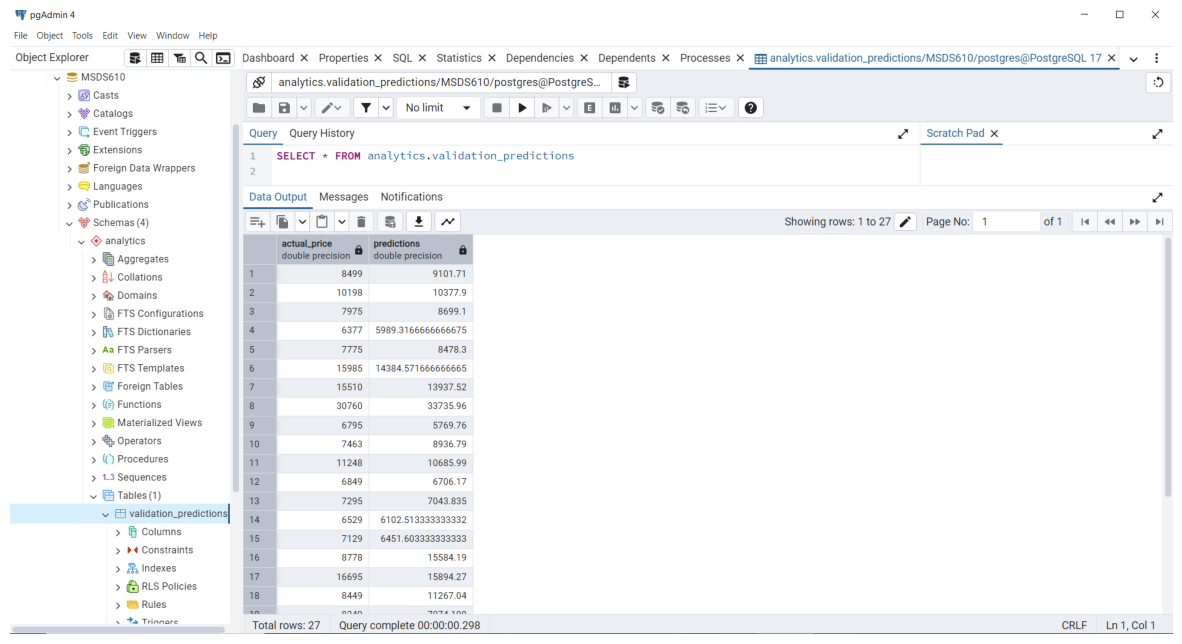

In [11]:
img = mpimg.imread('screenshot.PNG')

plt.figure(figsize=(15, 10))

plt.imshow(img)
plt.axis('off')  
plt.show()